In [160]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder

## Purchase Behaviour Dataset

In [162]:
purchase_df = pd.read_csv("purchase_behaviour.csv")
purchase_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [163]:
print("Purchases Data - Shape:", purchase_df.shape)
print("Null Values:\n", purchase_df.isna().sum())

Purchases Data - Shape: (72637, 3)
Null Values:
 LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [164]:
print("Unique Lifestage --> ", purchase_df['LIFESTAGE'].unique())

Unique Lifestage -->  ['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES']


In [165]:
print("Unique Premium Customer --> ", purchase_df['PREMIUM_CUSTOMER'].unique())

Unique Premium Customer -->  ['Premium' 'Mainstream' 'Budget']


## Transaction Data 

In [167]:
transaction_df = pd.read_csv("Transaction_data.csv")
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [168]:
print("Transaction Data - Shape:", transaction_df.shape)
print("Null Values:\n", transaction_df.isna().sum())

Transaction Data - Shape: (264836, 8)
Null Values:
 DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


## Top 3 Profitable Products

In [199]:
top_3_prod = transaction_df.groupby("PROD_NAME")["TOT_SALES"].sum().nlargest(3)
print(top_3_prod)

PROD_NAME
Dorito Corn Chp     Supreme 380g            40352.0
Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Name: TOT_SALES, dtype: float64


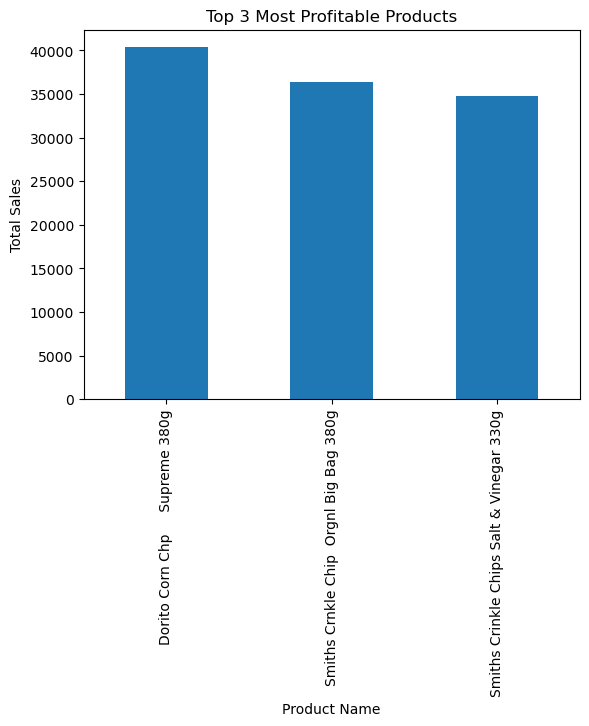

In [201]:
top_3_prod.plot(kind="bar")
plt.title("Top 3 Most Profitable Products")
plt.xlabel("Product Name")
plt.ylabel("Total Sales")
plt.show()

## Most Loyal Customers

In [173]:
#Extracting Features from the transaction data for customers

data = transaction_df.groupby('LYLTY_CARD_NBR').agg(
    frequency=('TXN_ID', 'nunique'),
    total_spend=('TOT_SALES', 'sum'),
    product_diversity=('PROD_NBR', 'nunique')
).reset_index()

data.head()

,LYLTY_CARD_NBR,frequency,total_spend,product_diversity
0,1000,1,6.0,1
1,1002,1,2.7,1
2,1003,2,6.6,2
3,1004,1,1.9,1
4,1005,1,2.8,1


In [174]:
customer_data = pd.merge(purchase_df, data, on = 'LYLTY_CARD_NBR')
customer_data

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,frequency,total_spend,product_diversity
0,1000,YOUNG SINGLES/COUPLES,Premium,1,6.0,1
1,1002,YOUNG SINGLES/COUPLES,Mainstream,1,2.7,1
2,1003,YOUNG FAMILIES,Budget,2,6.6,2
3,1004,OLDER SINGLES/COUPLES,Mainstream,1,1.9,1
4,1005,MIDAGE SINGLES/COUPLES,Mainstream,1,2.8,1
...,...,...,...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream,1,13.0,1
72633,2370701,YOUNG FAMILIES,Mainstream,1,7.2,1
72634,2370751,YOUNG FAMILIES,Premium,1,9.2,1
72635,2370961,OLDER FAMILIES,Budget,2,18.6,2


In [175]:
top_20_percent_threshold = customer_data['total_spend'].quantile(0.8)
profitable_customers = customer_data[customer_data['total_spend'] > top_20_percent_threshold]
profitable_customers

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,frequency,total_spend,product_diversity
662,3004,RETIREES,Premium,5,48.0,5
665,3007,MIDAGE SINGLES/COUPLES,Mainstream,5,48.4,4
672,3014,YOUNG SINGLES/COUPLES,Mainstream,5,68.0,6
673,3015,YOUNG FAMILIES,Budget,6,53.6,6
679,3022,YOUNG FAMILIES,Budget,9,80.9,9
...,...,...,...,...,...,...
72469,272208,OLDER FAMILIES,Premium,6,48.1,6
72477,272218,RETIREES,Budget,6,58.8,6
72481,272223,OLDER SINGLES/COUPLES,Budget,6,46.8,6
72580,272361,OLDER SINGLES/COUPLES,Mainstream,5,47.6,5


In [176]:
le_lifestage = LabelEncoder()
customer_data['LIFESTAGE'] = le_lifestage.fit_transform(customer_data['LIFESTAGE'])

le_premium = LabelEncoder()
customer_data['PREMIUM_CUSTOMER'] = le_premium.fit_transform(customer_data['PREMIUM_CUSTOMER'])

customer_data

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,frequency,total_spend,product_diversity
0,1000,6,2,1,6.0,1
1,1002,6,1,1,2.7,1
2,1003,5,0,2,6.6,2
3,1004,3,1,1,1.9,1
4,1005,0,1,1,2.8,1
...,...,...,...,...,...,...
72632,2370651,0,1,1,13.0,1
72633,2370701,5,1,1,7.2,1
72634,2370751,5,2,1,9.2,1
72635,2370961,2,0,2,18.6,2


In [177]:
X = customer_data[['LIFESTAGE', 'PREMIUM_CUSTOMER', 'frequency', 'total_spend', 'product_diversity']]
y = customer_data['total_spend'] > top_20_percent_threshold 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Parameters:", best_params)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [178]:
feature_importance = pd.DataFrame(best_rf_model.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)

In [179]:
feature_importance

,importance
total_spend,0.609363
frequency,0.225611
product_diversity,0.161826
LIFESTAGE,0.003109
PREMIUM_CUSTOMER,0.000091


In [180]:
cdf = profitable_customers.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg({'total_spend': 'mean', 'frequency': 'mean', 'product_diversity': 'mean'})
cdf = cdf.sort_values(by=['total_spend', 'frequency', 'product_diversity'], ascending=False).reset_index()
cdf

,LIFESTAGE,PREMIUM_CUSTOMER,total_spend,frequency,product_diversity
0,OLDER FAMILIES,Premium,62.499240,8.182410,8.005429
1,OLDER FAMILIES,Mainstream,62.316524,8.307363,8.073630
2,OLDER FAMILIES,Budget,62.171092,8.266561,8.073132
3,YOUNG FAMILIES,Premium,61.975191,8.231694,8.018579
4,YOUNG FAMILIES,Budget,61.657804,8.210492,7.994819
5,YOUNG FAMILIES,Mainstream,60.521218,8.167976,7.935167
6,YOUNG SINGLES/COUPLES,Premium,58.456863,7.620915,7.379085
7,YOUNG SINGLES/COUPLES,Mainstream,57.660444,7.205926,6.964444
8,YOUNG SINGLES/COUPLES,Budget,57.564979,7.493671,7.282700
9,MIDAGE SINGLES/COUPLES,Mainstream,57.461000,7.150769,6.943077
